In [87]:
import pandas as pd

In [88]:
df=pd.read_csv("plotting.csv")

In [89]:
df2=df.dropna()
df2.shape

(523, 20)

In [90]:
df2.reset_index(inplace=True)
df2.drop(["index"],axis=1)

,Rank,Name,City,Code,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website,lat,lon,State
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu,42.375100,-71.105616,Massachusetts
1,2,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu,37.426541,-122.170293,California
2,3,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu,41.308214,-72.925052,Connecticut
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0,www.web.mit.edu,42.375100,-71.105616,Massachusetts
4,5,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu,40.349274,-74.659296,New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,645,Morehouse College,Atlanta,GA,Private,2202,2219,34928.0,17318.0,48723,98700.0,74.0,950.0,1160.0,18.0,23.0,www.morehouse.edu,33.748992,-84.390264,Georgia
519,646,New Mexico State University,Las Cruces,NM,Public,13379,14432,8625.0,9582.0,34720,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu,32.314035,-106.779808,New Mexico
520,647,Indiana State University,Terre Haute,IN,Public,13626,13763,13012.0,9297.0,32938,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu,39.466703,-87.413912,Indiana
521,648,Emory &amp; Henry College,Emory,VA,Private,1094,1226,19340.0,27155.0,48100,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu,36.772891,-81.836234,Virginia


In [91]:
## from sklearn.datasets import make_classification

In [92]:
df2["SAT mean"]=(df2["SAT Lower"]+df2["SAT Upper"])/2


In [93]:
# reading values into new_x
X=pd.DataFrame()
X["SAT mean"]=df2["SAT mean"]
X["Acceptance Rate"]=df2["Acceptance Rate"]


# for i in range(523):
#     X.append([df2["SAT mean"][i],df2["Acceptance Rate"][i]])

In [94]:
X

,SAT mean,Acceptance Rate
0,1525.0,5.0
1,1465.0,5.0
2,1520.0,7.0
3,1530.0,7.0
4,1500.0,6.0
...,...,...
518,1055.0,74.0
519,1035.0,64.0
520,1005.0,85.0
521,1079.0,72.0


In [185]:
#Fitting K-MEans to the dataset
from sklearn.cluster import KMeans
kmeans1=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans1=kmeans1.fit_predict(X)

In [186]:
y=y_kmeans1

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [187]:
import numpy as np
from sklearn.cluster import KMeans
from typing import Tuple
def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies k-means clustering to training data to find clusters and predicts them for the test set
    """
    clustering = KMeans(n_clusters=n_clusters, random_state=9090,n_jobs=-1)
    clustering.fit(X_train)
    # apply the labels
    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    print(X_train_clstrs)
    X_train_clstrs["clusters"] = train_labels
    
    # predict labels on the test set
    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs["clusters"] = test_labels
    return X_train_clstrs, X_test_clstrs
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 4)

     SAT mean  Acceptance Rate
52     1320.0             24.0
74     1390.0             41.0
26     1425.0             10.0
220    1195.0             76.0
4      1500.0              6.0
..        ...              ...
70     1395.0             34.0
277    1080.0             68.0
9      1495.0             10.0
359    1140.0             70.0
192    1230.0             45.0

[366 rows x 2 columns]


In [241]:
y_train

array([1, 3, 3, 2, 3, 4, 2, 4, 3, 2, 4, 2, 0, 1, 3, 1, 3, 0, 3, 4, 4, 2,
       0, 3, 0, 2, 1, 4, 4, 4, 4, 4, 2, 0, 4, 4, 1, 4, 4, 3, 1, 2, 4, 0,
       4, 1, 2, 4, 1, 0, 4, 0, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 1, 3, 4,
       2, 2, 2, 1, 0, 3, 1, 1, 0, 4, 1, 2, 4, 2, 2, 0, 3, 4, 2, 3, 2, 4,
       2, 4, 3, 1, 4, 1, 0, 1, 1, 4, 1, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       2, 1, 3, 4, 1, 1, 2, 0, 0, 4, 4, 1, 3, 4, 3, 4, 2, 4, 4, 3, 0, 4,
       1, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 1, 3, 4, 2, 2,
       3, 2, 4, 4, 0, 3, 0, 4, 1, 4, 0, 3, 2, 4, 4, 4, 2, 1, 1, 4, 1, 2,
       2, 3, 0, 4, 1, 4, 1, 4, 2, 4, 2, 0, 4, 4, 4, 4, 3, 4, 4, 4, 2, 0,
       3, 0, 2, 2, 4, 2, 2, 0, 4, 4, 4, 0, 2, 4, 1, 2, 4, 3, 4, 4, 3, 1,
       3, 4, 3, 3, 2, 1, 2, 0, 4, 0, 1, 2, 1, 0, 0, 1, 1, 3, 4, 3, 0, 4,
       3, 4, 2, 4, 2, 3, 2, 4, 4, 4, 2, 4, 2, 1, 4, 1, 4, 2, 3, 2, 3, 4,
       2, 2, 2, 1, 4, 1, 2, 4, 4, 4, 2, 4, 1, 2, 4, 2, 1, 0, 1, 4, 0, 0,
       0, 2, 3, 1, 4, 4, 1, 4, 2, 1, 0, 4, 2, 4, 0,

In [188]:
X_train_clstrs['clusters'].head(30)

52     3
74     1
26     1
220    2
4      1
339    2
263    2
399    2
5      1
141    2
272    2
135    2
519    0
122    3
22     1
68     3
20     1
455    0
14     1
170    2
351    2
252    2
479    0
64     1
461    0
120    3
81     3
379    2
322    2
190    2
Name: clusters, dtype: int32

In [189]:
X_test_clstrs

,SAT mean,Acceptance Rate,clusters
15,1530.0,9.0,1
78,1325.0,36.0,3
137,1280.0,64.0,3
264,1132.5,77.0,2
113,1235.0,67.0,3
...,...,...,...
34,1335.0,16.0,3
407,985.0,46.0,0
245,1210.0,78.0,2
208,1210.0,73.0,2


In [190]:
from sklearn.preprocessing import StandardScaler
def scale_features(X_train: pd.DataFrame, X_test: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies standard scaler (z-scores) to training data and predicts z-scores for the test set
    """
    scaler = StandardScaler()
    to_scale = [col for col in X_train.columns.values]
    scaler.fit(X_train[to_scale])
    X_train[to_scale] = scaler.transform(X_train[to_scale])
    
    # predict z-scores on the test set
    X_test[to_scale] = scaler.transform(X_test[to_scale])
    
    return X_train, X_test
X_train_scaled, X_test_scaled = scale_features(X_train_clstrs, X_test_clstrs)

In [191]:
X_train_scaled["clusters"].head(30)

52     1.285530
74    -0.581549
26    -0.581549
220    0.351990
4     -0.581549
339    0.351990
263    0.351990
399    0.351990
5     -0.581549
141    0.351990
272    0.351990
135    0.351990
519   -1.515089
122    1.285530
22    -0.581549
68     1.285530
20    -0.581549
455   -1.515089
14    -0.581549
170    0.351990
351    0.351990
252    0.351990
479   -1.515089
64    -0.581549
461   -1.515089
120    1.285530
81     1.285530
379    0.351990
322    0.351990
190    0.351990
Name: clusters, dtype: float64

In [192]:
X_train_scaled

,SAT mean,Acceptance Rate,clusters
52,0.859389,-1.715729,1.285530
74,1.434801,-0.928757,-0.581549
26,1.722507,-2.363823,-0.581549
220,-0.168132,0.691477,0.351990
4,2.339019,-2.548992,-0.581549
...,...,...,...
70,1.475902,-1.252804,-0.581549
277,-1.113451,0.321138,-1.515089
9,2.297918,-2.363823,-0.581549
359,-0.620241,0.413723,0.351990


In [195]:
# to divide the df by cluster, we need to ensure we use the correct class labels, we'll use pandas to do that
train_clusters = X_train_scaled.copy()
test_clusters = X_test_scaled.copy()
train_clusters['y'] = y_train
test_clusters['y'] = y_test
# locate the "0" cluster
train_0 = train_clusters.loc[train_clusters.clusters < -1] # after scaling, 0 went negtive
test_0 = test_clusters.loc[test_clusters.clusters < -1]
y_train_0 = train_0.y.values
y_test_0 = test_0.y.values

# locate the "1" cluster
train_1 = train_clusters.loc[(train_clusters["clusters"] <0) | (train_clusters["clusters"] > -1) ] # after scaling, 1 dropped slightly
test_1 = test_clusters.loc[(test_clusters.clusters <0) | (train_clusters.clusters > -1) ]
y_train_1 = train_1.y.values
y_test_1 = test_1.y.values
# locate the "2" cluster
train_2 = train_clusters.loc[(train_clusters.clusters <1) | (train_clusters.clusters > 0) ] # after scaling, 1 dropped slightly
test_2 = test_clusters.loc[(test_clusters.clusters <1) | (train_clusters.clusters > 0) ]
y_train_2 = train_2.y.values
y_test_2 = test_2.y.values
# locate the "3" cluster
train_3 = train_clusters.loc[(train_clusters.clusters <2) | (train_clusters.clusters > 1) ] # after scaling, 1 dropped slightly
test_3 = test_clusters.loc[(test_clusters.clusters <2) | (train_clusters.clusters > 1) ]
y_train_3 = train_3.y.values
y_test_3 = test_3.y.values
# locate the "4" cluster
# train_4 = train_clusters.loc[train_clusters.clusters > 2 ] # after scaling, 1 dropped slightly
# test_4 = test_clusters.loc[test_clusters.clusters > 2 ]
# y_train_4 = train_4.y.values
# y_test_4 = test_4.y.values



# the base dataset has no "clusters" feature
X_train_base = X_train_scaled.drop(columns=['clusters'])
X_test_base = X_test_scaled.drop(columns=['clusters'])
# drop the targets from the training set
X_train_0 = train_0.drop(columns=['y'])
X_test_0 = test_0.drop(columns=['y'])
X_train_1 = train_1.drop(columns=['y'])
X_test_1 = test_1.drop(columns=['y'])
X_train_2 = train_2.drop(columns=['y'])
X_test_2 = test_2.drop(columns=['y'])
X_train_3 = train_3.drop(columns=['y'])
X_test_3 = test_3.drop(columns=['y'])
# X_train_4 = train_4.drop(columns=['y'])
# X_test_4 = test_4.drop(columns=['y'])

datasets = {
    'base': (X_train_base, y_train, X_test_base, y_test),
    'cluster-feature': (X_train_scaled, y_train, X_test_scaled, y_test),
    'cluster-0': (X_train_0, y_train_0, X_test_0, y_test_0),
    'cluster-1': (X_train_1, y_train_1, X_test_1, y_test_1),
    'cluster-2': (X_train_2, y_train_2, X_test_2, y_test_2),
    'cluster-3': (X_train_3, y_train_3, X_test_3, y_test_3)
    #'cluster-4': (X_train_4, y_train_4, X_test_4, y_test_4),


}

In [196]:
datasets

{'base': (     SAT mean  Acceptance Rate
  52   0.859389        -1.715729
  74   1.434801        -0.928757
  26   1.722507        -2.363823
  220 -0.168132         0.691477
  4    2.339019        -2.548992
  ..        ...              ...
  70   1.475902        -1.252804
  277 -1.113451         0.321138
  9    2.297918        -2.363823
  359 -0.620241         0.413723
  192  0.119574        -0.743588
  
  [366 rows x 2 columns],
  array([1, 3, 3, 2, 3, 4, 2, 4, 3, 2, 4, 2, 0, 1, 3, 1, 3, 0, 3, 4, 4, 2,
         0, 3, 0, 2, 1, 4, 4, 4, 4, 4, 2, 0, 4, 4, 1, 4, 4, 3, 1, 2, 4, 0,
         4, 1, 2, 4, 1, 0, 4, 0, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 1, 3, 4,
         2, 2, 2, 1, 0, 3, 1, 1, 0, 4, 1, 2, 4, 2, 2, 0, 3, 4, 2, 3, 2, 4,
         2, 4, 3, 1, 4, 1, 0, 1, 1, 4, 1, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4,
         2, 1, 3, 4, 1, 1, 2, 0, 0, 4, 4, 1, 3, 4, 3, 4, 2, 4, 4, 3, 0, 4,
         1, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 1, 3, 4, 2, 2,
         3, 2, 4, 4, 0, 3, 0, 4, 1, 4, 0, 

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
def run_exps(datasets: dict) -> pd.DataFrame:
    '''
    runs experiments on a dict of datasets
    '''
    # initialize a logistic regression classifier
    model = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=0, max_iter=200)
    
    dfs = []
    results = []
    conditions = []
    scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
    #print(datasets.items())
    for condition, splits in datasets.items():
        #print(condition)
        X_train = splits[0]
        y_train = splits[1]
        X_test = splits[2]
        y_test = splits[3]
        #print(X_train, y_train)
        
        kfold = model_selection.KFold(n_splits=4, shuffle=True, random_state=0)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        print(cv_results)
        clf = model.fit(X_train, y_train)
        #print(clf)
        y_pred = clf.predict(X_test)
        
        #print(classification_report(y_test, y_pred))
        results.append(cv_results)
        #print(results)
        conditions.append(condition)
        this_df = pd.DataFrame(cv_results)
        this_df['condition'] = condition
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    print(final)
    
    # We have wide format data, lets use pd.melt to fix this
    results_long = pd.melt(final,id_vars=['condition'],var_name='metrics', value_name='values')
    
    # fit time metrics, we don't need these
    time_metrics = ['fit_time','score_time'] 
    results = results_long[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    results = results.sort_values(by='values')
    
    return results
df3 = run_exps(datasets)

{'fit_time': array([0.02393651, 0.03191471, 0.03091955, 0.02094388]), 'score_time': array([0.00498724, 0.00498676, 0.00398731, 0.00498343]), 'test_accuracy': array([0.92391304, 0.91304348, 0.87912088, 0.93406593]), 'test_precision_weighted': array([0.93328005, 0.91304348, 0.88967827, 0.94004482]), 'test_recall_weighted': array([0.92391304, 0.91304348, 0.87912088, 0.93406593]), 'test_f1_weighted': array([0.92547277, 0.91304348, 0.88105246, 0.93427549])}
{'fit_time': array([0.01994681, 0.01994681, 0.01994658, 0.01994514]), 'score_time': array([0.00398946, 0.00399017, 0.0039897 , 0.00398827]), 'test_accuracy': array([0.77173913, 0.80434783, 0.8021978 , 0.8021978 ]), 'test_precision_weighted': array([0.83327166, 0.83443588, 0.82090599, 0.84795457]), 'test_recall_weighted': array([0.77173913, 0.80434783, 0.8021978 , 0.8021978 ]), 'test_f1_weighted': array([0.77970516, 0.80534685, 0.80353593, 0.80814912])}
{'fit_time': array([0.00598407, 0.00498605, 0.00698137, 0.00698113]), 'score_time': ar

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
def run_exps(datasets: dict) -> pd.DataFrame:
    '''
    runs experiments on a dict of datasets
    '''
    # initialize a logistic regression classifier
    model = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=250)
    
    dfs = []
    results = []
    conditions = []
    scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
    #print(datasets.items())
    for condition, splits in datasets.items():
        X_train = splits[0]
        y_train = splits[1]
        X_test = splits[2]
        y_test = splits[3]
        
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        #print(condition)
        #print(classification_report(y_test, y_pred))
        results.append(cv_results)
        conditions.append(condition)
        #print(results)
        
        #print(conditions)
        this_df = pd.DataFrame(cv_results)
        this_df['condition'] = condition
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    #print(final)
    
    # We have wide format data, lets use pd.melt to fix this
    results_long = pd.melt(final,id_vars=['condition'],var_name='metrics', value_name='values')
    #print(results_long)
    
    # fit time metrics, we don't need these
    time_metrics = ['fit_time','score_time'] 
    results = results_long[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    print(results)
    #print(results["values"][8].mean())
    #results["values"]=results[results["values"]]
    results = results.sort_values(by='values')
    print(results)
    
    return results
data_f = run_exps(datasets)

     condition           metrics    values
60        base     test_accuracy  0.932432
61        base     test_accuracy  0.890411
62        base     test_accuracy  0.890411
63        base     test_accuracy  0.958904
64        base     test_accuracy  0.917808
..         ...               ...       ...
175  cluster-3  test_f1_weighted  0.783670
176  cluster-3  test_f1_weighted  0.778584
177  cluster-3  test_f1_weighted  0.751307
178  cluster-3  test_f1_weighted  0.835289
179  cluster-3  test_f1_weighted  0.881976

[120 rows x 3 columns]
           condition                  metrics    values
130        cluster-0     test_recall_weighted  0.705882
70         cluster-0            test_accuracy  0.705882
160        cluster-0         test_f1_weighted  0.740758
167        cluster-1         test_f1_weighted  0.751307
157  cluster-feature         test_f1_weighted  0.751307
..               ...                      ...       ...
93              base  test_precision_weighted  0.963243
164        c

In [238]:
data_f

,condition,metrics,values
130,cluster-0,test_recall_weighted,0.705882
70,cluster-0,test_accuracy,0.705882
160,cluster-0,test_f1_weighted,0.740758
167,cluster-1,test_f1_weighted,0.751307
157,cluster-feature,test_f1_weighted,0.751307
...,...,...,...
93,base,test_precision_weighted,0.963243
164,cluster-0,test_f1_weighted,1.000000
134,cluster-0,test_recall_weighted,1.000000
74,cluster-0,test_accuracy,1.000000


Text(0.5, 1.0, 'Comparison of Dataset by Classification Metric')

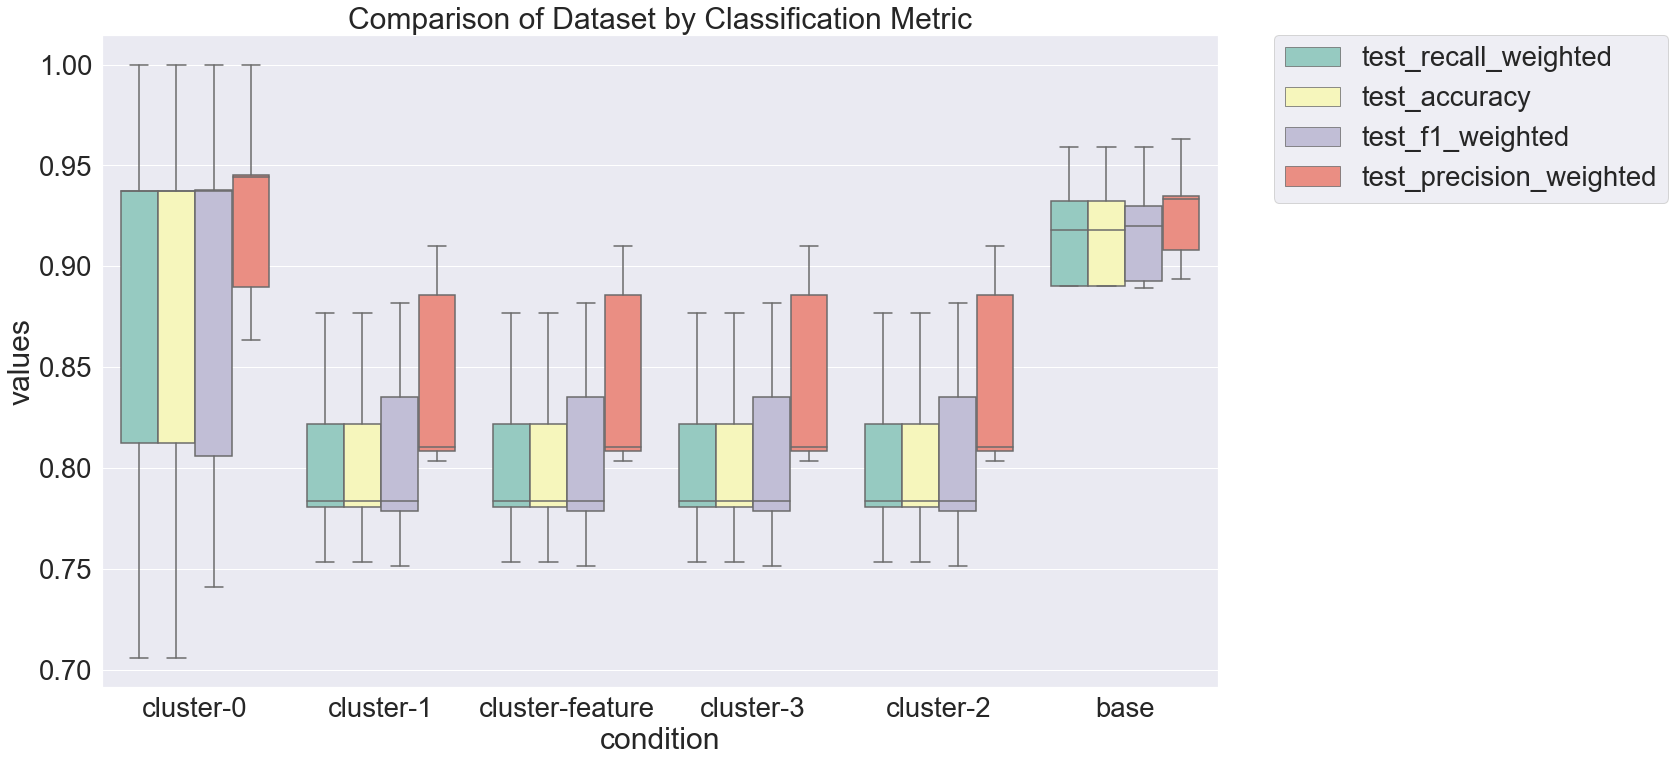

In [239]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="condition", y="values", hue="metrics", data=data_f, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Dataset by Classification Metric')

In [240]:
pd.pivot_table(df, index='condition',columns=['metrics'],values=['values'], aggfunc='mean')

values                                           \
metrics         test_accuracy test_f1_weighted test_precision_weighted   
condition                                                                
base                 0.917993         0.918247                0.926640   
cluster-0            0.878676         0.884285                0.928620   
cluster-1            0.803332         0.806165                0.843668   
cluster-2            0.803332         0.806165                0.843668   
cluster-3            0.803332         0.806165                0.843668   
cluster-feature      0.803332         0.806165                0.843668   

                                      
metrics         test_recall_weighted  
condition                             
base                        0.917993  
cluster-0                   0.878676  
cluster-1                   0.803332  
cluster-2                   0.803332  
cluster-3                   0.803332  
cluster-feature             0.803332